In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential


df = pd.read_table(r"../input/dl-dataset/hourly_wages.txt", sep = ',')
predictors = df.iloc[:, 1:].to_numpy()
target = df.iloc[:, 0].values
n_cols = predictors.shape[1]

## 1. Understanding model optimization
At this point, you have a good understanding of how neural networks work, and how to build them in Keras. But you probably don't yet have a great intuition for how to choose things like model architecture and model optimization arguments. You'll learn that in this last chapter.
### 1.1. Theory
#### Why optimization is hard
In practice, optimization is a hard problem. 
- The optimal value for any one weight depends on the values of the other weights, and we are **optimizing many weights at once**. 
- Even if the `slope` tells us which `weights` to increase, and which to decrease, our **updates may not improve our model meaningfully**. 

>> A **small** `learning rate` might cause us to make such small `updates` to the `model's weights` that our `model` *doesn't improve materially*. 

>> A **very large** `learning rate` might take us too far (high) *in the direction that seemed good*. 

>> A smart optimizer like `Adam` helps, but optimization problems can still occur. The easiest way to see the effect of different learning rates is to use the simplest optimizer,

#### Stochastic gradient descent
`Stochastic Gradient Descent`, sometimes abbreviated to `SGD`. 

This optimizer uses a fixed learning rate. Learning rates around `0.01` are common. 

- We have a function that creates a `new model` here.

In [2]:
def get_new_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = input_shape))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(1))
    
    return model

lr_to_test = [0.000001, 0.01, 1]

But you can specify the learning rate you need with `lr` argument as shown here. 

In [3]:
from keras.optimizers import SGD

for lr in lr_to_test:
    model = get_new_model(input_shape = (n_cols, ))
    print('For learning_rate = ', lr)
    my_optimizer = SGD(lr = lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    model.fit(predictors, target)
    print(40*'<>')

For learning_rate =  1e-06
17/17 [==============================] - 0s 1ms/step - loss: 1.0586e-06
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
For learning_rate =  0.01
17/17 [==============================] - 0s 1ms/step - loss: 1.0656e-06
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
For learning_rate =  1
17/17 [==============================] - 0s 1ms/step - loss: 1.0642e-06
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


- We create `model`s in a for loop, and each time around we compile the model using `SGD` with a different learning rate. 
- We pass in the `optimizer` with the same argument where we previously passed the string for `"Adam"`.

In an exercise, you will compare the results of training models trained with low, medium and high learning rates. Even if your learning rate is well tuned, you can run into the so-called `"dying-neuron" problem`. 

#### The dying neuron problem
This problem occurs when a neuron takes a value less than 0 for all rows of your data. 

Recall that, with the `ReLU activation function`, any node with a negative input value produces an output of 0, and it also has a `slope` of 0 as you see in this graph. 

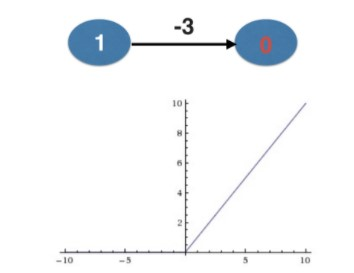

In [4]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

Because the `slope` is 0, the `slope` of any `weights` flowing into that `node` are also 0. So *those `weights` don't get updated*. 

In other words, once the `node` starts always getting `negative inputs`, it **may** *continue only getting negative inputs*. It's contributing nothing to the `model` at this point, and hence the claim that the `node or neuron` is **`"dead"`**. At first, this might suggest using an `activation function` whose `slope` is never exactly zero. 

However, those types of functions were used for many years.

#### Vanishing gradients
For example, in an earlier video we used an s-shaped function called `tanh`. 

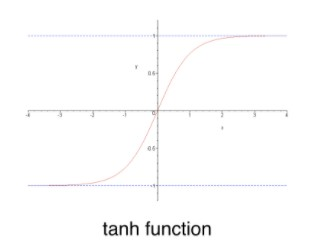

In [5]:
## Hình minh họa Image(fig1, height, width)

- However, values that were outside the middle of the `S` were relatively flat, or had small slopes. A small but non-zero slope might work in a network with only a few hidden layers. 
- But in a deep network, one with many layers, the repeated multiplication of small slopes causes the *slopes to get close to 0*, which meant updates in backprop were close to 0. This is called the **vanishing gradient problem**. 
- This in turn might suggest using an activation function that isn't even close to flat anywhere. There is research in this area, including variations on `ReLU`. Those aren't widely used though. 

For now, it's a phenomenon worth keeping in mind if you are ever pondering why your model isn't training better. If it happens, changing the `activation function` may be the solution

### 1.2. PRACTICE
#### Exercise 1.2.1. Diagnosing optimization problems
Which `factors` could **prevent** a model from showing an improved loss in its first few epochs?
#### Answers,
There are:
- **Poor choice of activation function.**. a poor choice of activation function could prevent a model from showing an improved loss in its first few epochs.
- **Learning_rate to low**. A learning rate that is too low could indeed prevent a model from showing an improved loss in its first few epochs.
- **Learning_rate to high**. A very high learning rate could prevent a model from showing an improved loss in its first few epochs

#### Exercise 1.2.2. Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.
#### SOLUTION

In [6]:
# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape = (n_cols, ))
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

17/17 [==============================] - 0s 1ms/step - loss: 1.0853e-06


Testing model with learning rate: 0.001000

17/17 [==============================] - 0s 1ms/step - loss: 1.0664e-06


Testing model with learning rate: 0.010000

17/17 [==============================] - 0s 1ms/step - loss: 1.0787e-06


Testing model with learning rate: 1.000000

17/17 [==============================] - 0s 1ms/step - loss: 1.0617e-06


## 2. Model validation
### 2.1. Theory.
You may recall from previous machine learning classes that your model's performance on the training data is not a good indication of how it will perform on new data. 

For this reason, we use validation data to test model performance. Validation data is data that is explicitly held out from training, and used only to test model performance.

#### Validation in deep learning
You may already be familiar with `k-fold` cross validation. 

In practice, few people run `k-fold cross validation` on deep learning models because deep learning is typically used on large datasets. So the computational expense of running `k-fold validation` would be large, and we usually trust a score from a single validation run because those validation runs are reasonably large. 

`Keras` makes it easy to use some of your data as validation data, and we see that in this code, where we specify the split using the keyword argument `validation_split` when calling the fit method.

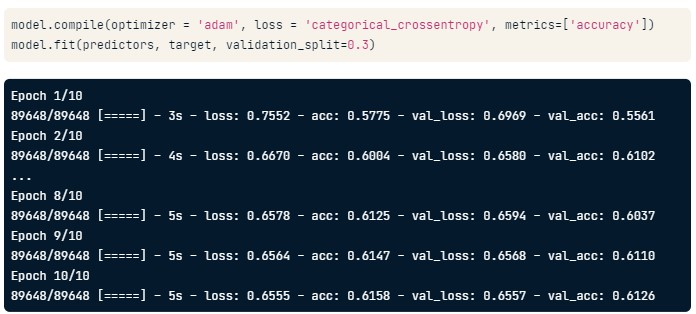

In [7]:
## Hình minh họa Image(fig1, height, width)

#### Model validation
Here, we have already specified a model, and we'll make small changes in both the compile and fit steps to see model validation information. 
- This is a classification problem, and we'd like to see measures of accuracy. 
- So, we include metrics equals `'accuracy'` in the `compile step`. 
- In the `fit step`, we specify what fraction of the data is used for validation. In this case, we'll use 30%.
- Our goal is to have the best validation score possible, so we should keep training while validation score is improving, and then stop training when the `validation score` isn't improving. 

We do this with something called `"early stopping."`

#### Early Stopping
We can use early stopping with only some small changes to the code. See here, we've imported something called `EarlyStopping`. 

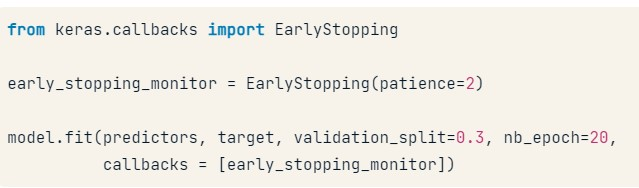

In [8]:
## Hình minh họa Image(fig1, height, width)

We then create an `"early stopping monitor"` before fitting the model. That monitor takes an argument called patience, which is how many epochs the model can go without improving before we stop training. 

2 or 3 are reasonable values for patience. 
- Sometimes you'll get a single epoch with no improvement, but the model will start improving again after that epoch. 
- But if you see 3 epochs with no improvement, it's unlikely to turn around and start improving again. We pass early_stopping_monitor to the fit function under an argument called callbacks. 
- Notice that callbacks takes a list. You may consider adding other callbacks as you become very advanced. 

>> But early stopping is all you want for now. 

>> By default, keras trains for 10 epochs. 

Now that we have smart logic for determining when to stop, we can set a high maximum number of epochs. This happens with the nb_epoch argument, as you see here. Keras will go until this number of epochs, unless the validation loss stops improving, in which case it will stop earlier.

This is smarter training logic than relying on a fixed number of epochs without looking at the validation scores.

#### Output from early stopping
Let's look at the output. 

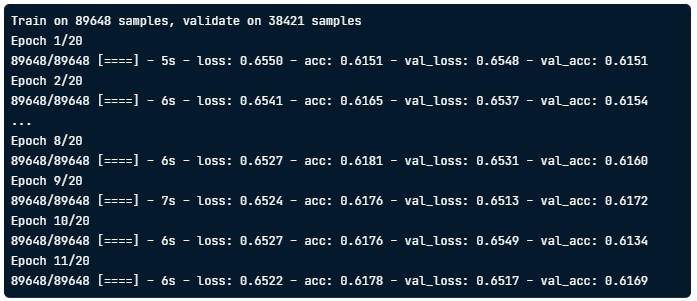

In [9]:
## Hình minh họa Image(fig1, height, width)

- In **epoch 9** we had a `validation loss` score of `0.6513`.
- We didn't beat that score in the next 2 epochs, so we stopped training. 

#### Experimentation
Now that you have a reliable way of measuring model performance, namely through scores, you should feel free to experiment with different architectures. 
- More layers, 
- fewer layers. 
- Layers with more nodes, 
- layers with fewer nodes. 
- And so on. 

Creating a great model requires some experimentation. Before we finish, we'll give a little bit of insight into how to choose where you experiment

### 2.2. PRACTICES
#### Exercise 2.2.1. Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A `model` definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.
#### SOLUTION

In [10]:
from keras.utils import to_categorical

titanic = pd.read_table(r"../input/dl-dataset/titanic.txt", sep = ',')
target = to_categorical(titanic.survived.values)
predictors = titanic.iloc[:, 1:].to_numpy()
predictors = np.asarray(predictors).astype('float32')

In [11]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

# Fit the model (history)
hist = model.fit(predictors, target, validation_split = 0.3, epochs = 10)

Epoch 1/10
20/20 [==============================] - 1s 30ms/step - loss: 5.0308 - accuracy: 0.4991 - val_loss: 0.8254 - val_accuracy: 0.6978
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.9164 - accuracy: 0.6315 - val_loss: 0.6021 - val_accuracy: 0.6903
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.6240 - val_loss: 0.5534 - val_accuracy: 0.7313
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6510 - val_loss: 0.5382 - val_accuracy: 0.7575
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6635 - val_loss: 0.5034 - val_accuracy: 0.7463
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6769 - val_loss: 0.5140 - val_accuracy: 0.7537
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.6253 - val_loss: 0.4928 - val_accuracy: 0.7612
Epoch 8/10
20/20 [=

#### Exercise 2.2.2. Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to `.fit()`.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as `predictors` and `target`.
#### SOLUTION.

In [12]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping 

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(predictors, target, validation_split = 0.3, epochs = 30, callbacks = [early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 13ms/step - loss: 2.7520 - accuracy: 0.5255 - val_loss: 0.8184 - val_accuracy: 0.6604
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.9156 - accuracy: 0.6072 - val_loss: 0.6855 - val_accuracy: 0.6642
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.6482 - val_loss: 0.6447 - val_accuracy: 0.6791
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.6678 - val_loss: 0.5426 - val_accuracy: 0.7799
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.6545 - val_loss: 0.5426 - val_accuracy: 0.7164
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6862 - val_loss: 0.6166 - val_accuracy: 0.7201


**Comments.**
Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 6 epochs.

#### Exercise 2.2.3. Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called `model_1` has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In [13]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation = 'softmax'))
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In this exercise you'll create a new model called `model_2` which is similar to `model_1`, except it has 100 units in each hidden layer.

After you create `model_2`, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument `verbose=False` in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.
#### SOLUTION

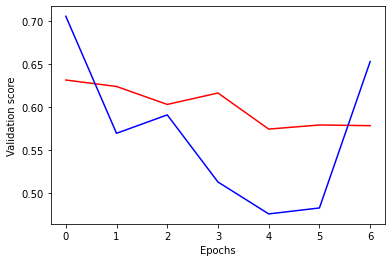

In [14]:
# import library
import matplotlib.pyplot as plt

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

**Comments.** The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model.

#### Exercise 2.2.4. Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called `model_1` as a starting point.

In [15]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(2, activation = 'softmax'))
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 102       
Total params: 3,202
Trainable params: 3,202
Non-trainable params: 0
_________________________________________________________________


It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.
#### SOLUTION.

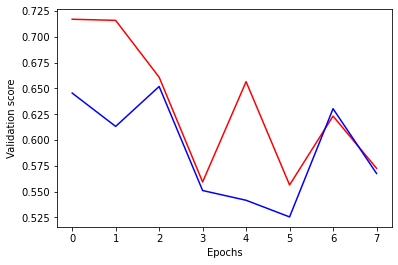

In [16]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation = 'relu', input_shape = input_shape))
model_2.add(Dense(50, activation = 'relu'))
model_2.add(Dense(50, activation = 'relu'))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

**Comments.** The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

## 3. Thinking about model capacity
### 3.1. Theory.
At this point, you know how to run experiments, and compare different models performance. 

*However, it takes some practice to get an intuition for what experiments or architectures to try*. There is still a little more art to finding good deep learning architectures than there is for tuning other machine learning algorithms. 

But something called `"model capacity"` should be one of the key considerations you think about when deciding what models to try.`"Model capacity"` or `"network capacity"` is closely related to the terms overfitting and underfitting.

#### Overfitting
Overfitting is the ability of a model to fit oddities in your training data that are there purely due to happenstance, and that won't apply in a new dataset. 

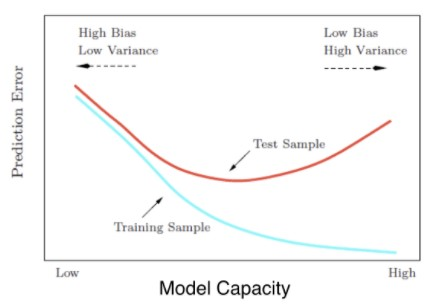

In [17]:
## Hình minh họa Image(fig1, height, width)

When you are overfitting, your model will make accurate predictions on training data, but it will make inaccurate predictions on validation data and new datasets. Underfitting is the opposite. That is when your model fails to find important predictive patterns in the training data. So it is accurate in neither the training data nor validation data. Because we want to do well on new datasets that weren't used for training the model, our validation score is the ultimate measure of a model's predictive quality. 

Let's get back to model capacity. Model capacity is a model's ability to capture predictive patterns in your data. So, the more capacity a model, the further to the right we will be on this graph. If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity. 

#### Workflow for optimizing model capacity
Said another way, making larger layers or increasing the number of layers moves you further to the right of this graph. So, with that in mind, here is a good workflow for you. Start with a simple network, and get the validation score. Then keep adding capacity as long as the score keeps improving. Once it stops improving, you can decrease capacity slightly, but you are probably near the ideal.

#### Sequential experiments
Let's walk through that process once. Here, I've started a model that has one hidden layer and 100 units.

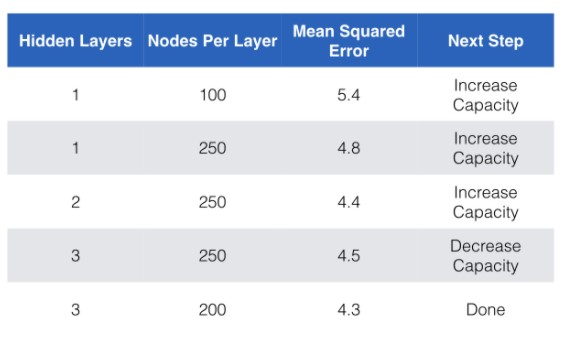

In [18]:
## Hình minh họa Image(fig1, height, width)

That's a relatively simple, or low capacity, model. I get a mean squared error of 5-point-4. Since I started with a simple model, I now try increasing capacity. I could increase the number of layers or use more hidden nodes. I'll start by using more nodes in the one hidden layer. That improved the model, so I'll keep increasing capacity.

This time I'll switch to using 2 hidden layers. Each layer has 250 nodes. That improved the error more. So, I try 3 layers, continuing to add capacity as long as it helps.

This hurt the score. So, the model with 2 layers and 250 nodes is about perfect. I'll try another model that reduces capacity slightly from the last model I built.

That is 3 hidden layers with 200 nodes each. That seems the best model yet. So I'll stick with that. Should you change capacity by adding layers or by adding nodes to an existing layer? There isn't a universal answer to that. You can experiment. But you should generally be thinking about whether you are trying to increase or decrease capacity, ideally honing in on the right capacity by looking at validation scores.

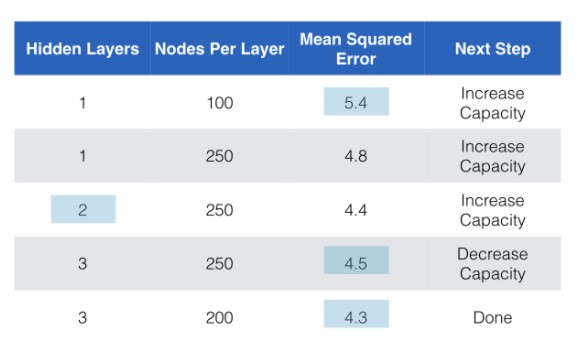

In [19]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICE
#### Exercise 3.2.1. Experimenting with model structures
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

>- A. Try a new network with fewer layers than anything you have tried yet.
>- B. Use more units in each hidden layer.
>- C. Use fewer units in each hidden layer.

#### Answers.
>- A. Incorrect - reducing the number of layers is unlikely to improve performance.
>- **B. Correct!!** Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.
>- C. Not quite - using fewer units in each hidden layer is unlikely to improve performance

## 4. Stepping up to images
### 4.1. Theory.
To close, you are going to apply your knowledge to a new and different dataset.

#### Recognizing handwritten digits
This is the MNIST dataset, which contains images of handwritten digits.

In [20]:
mnist = pd.read_table(r"../input/dl-dataset/mnist.txt", sep = ',')
X = mnist.iloc[:, 1:]
y = to_categorical(mnist.iloc[:, 0])

This is a very popular dataset for getting started working with images. 
- There is an image of each handwritten digit, and each image is composed of a 28 pixel by 28 pixel grid. 
- The image is represented by showing how dark each pixel is. So, 0 would be as light as possible, and 255 is as dark as possible. 

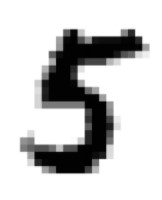

In [21]:
## Hình minh họa Image(fig1, height, width)

>> I've flattened the `28 x 28` grid for you into a `784 x 1 array` for each image. 

>> Each image shows a digit like 0, 1, 2, 3 4, all the way up to 9. 

>> Your model will predict which digit it is that was written. So you will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output. 

In [22]:
X.shape, y.shape

((2000, 784), (2000, 10))

### 4.2. PRACTICES
#### Exercise 4.2.1. Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have `X` and `y` loaded and ready to model with. Sequential and `Dense` from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.
#### SOLUTION.

In [23]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (X.shape[1], )))

# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(X, y, validation_split = 0.3, epochs = 10)

Epoch 1/10
44/44 [==============================] - 1s 7ms/step - loss: 40.3167 - accuracy: 0.2385 - val_loss: 8.7088 - val_accuracy: 0.4783
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 4.1551 - accuracy: 0.6892 - val_loss: 4.8164 - val_accuracy: 0.6717
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 2.0498 - accuracy: 0.8086 - val_loss: 4.3967 - val_accuracy: 0.6617
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 1.1802 - accuracy: 0.8412 - val_loss: 3.8703 - val_accuracy: 0.6867
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.9115 - val_loss: 3.8392 - val_accuracy: 0.6833
Epoch 6/10
44/44 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.8951 - val_loss: 3.4084 - val_accuracy: 0.7467
Epoch 7/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.9354 - val_loss: 3.3225 - val_accuracy: 0.7383
Epoch 8/10
44/44 [=

**Comments** You've done something pretty amazing. You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 1750 images!